In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import _BaseNB

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("TrainingWiDS2021.csv")

In [5]:
data.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
data.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)

In [7]:
print(data.describe())

          Unnamed: 0   encounter_id    hospital_id            age  \
count  130157.000000  130157.000000  130157.000000  125169.000000   
mean    65079.000000  213000.856519     106.102131      61.995103   
std     37573.233831   38109.828146      63.482277      16.822880   
min         1.000000  147000.000000       1.000000       0.000000   
25%     32540.000000  180001.000000      49.000000      52.000000   
50%     65079.000000  213014.000000     112.000000      64.000000   
75%     97618.000000  246002.000000     165.000000      75.000000   
max    130157.000000  279000.000000     204.000000      89.000000   

                 bmi  elective_surgery         height         icu_id  \
count  125667.000000     130157.000000  128080.000000  130157.000000   
mean       29.110260          0.189840     169.607219     662.428344   
std         8.262776          0.392176      10.833085     304.259843   
min        14.844926          0.000000     137.200000      82.000000   
25%        23.5980

In [13]:
subset = data[["diabetes_mellitus","age", "bmi", "height", "pre_icu_los_days", "heart_rate_apache", "map_apache", "glucose_apache"]]

In [8]:
y = data["diabetes_mellitus"]

In [9]:
X = data[["age", "bmi", "height", "pre_icu_los_days", "heart_rate_apache", "map_apache", "glucose_apache" ]]

<Axes: ylabel='Count'>

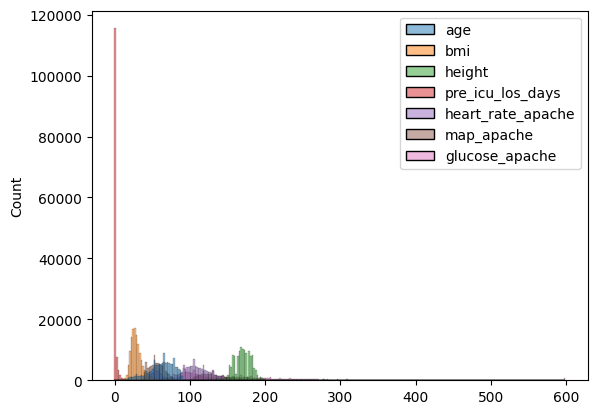

In [11]:
sns.histplot(X)

<Axes: >

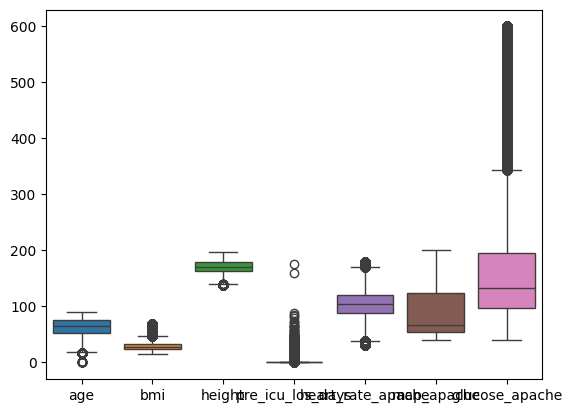

In [12]:
sns.boxplot(X)

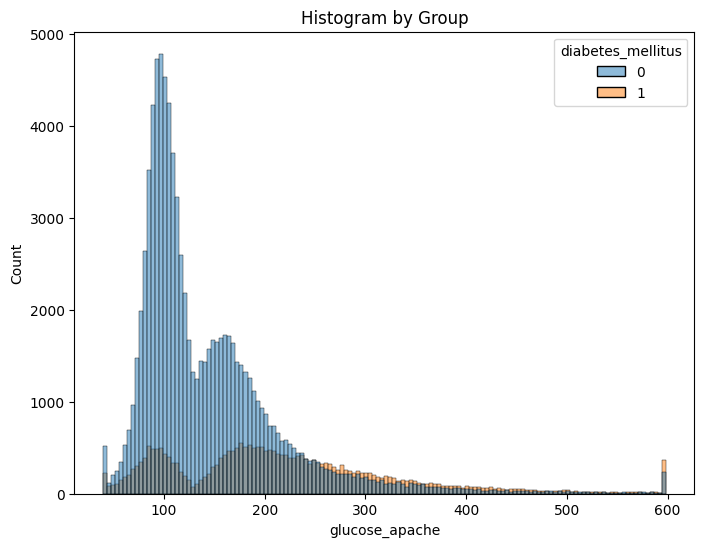

In [17]:
# you can also create histogram by groups
plt.figure(figsize=(8, 6))
sns.histplot(data=subset, x='glucose_apache', hue="diabetes_mellitus")
plt.title('Histogram by Group')
plt.show()

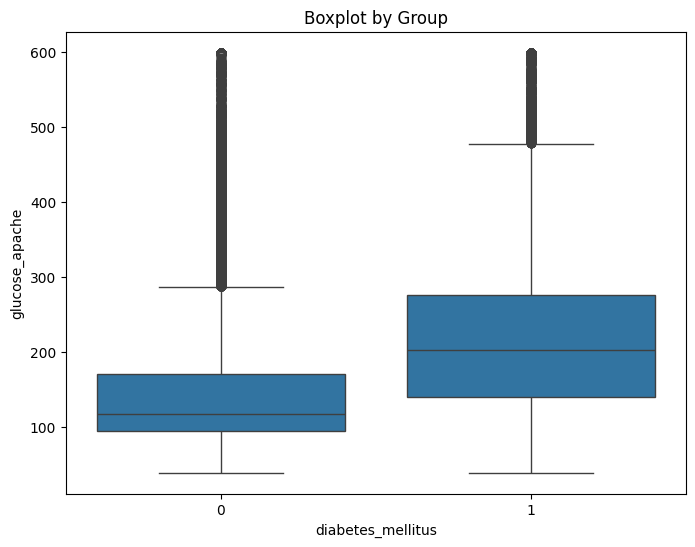

In [20]:
# you can also create boxplot by groups

plt.figure(figsize=(8, 6))
sns.boxplot(data=subset, y='glucose_apache', x="diabetes_mellitus")
plt.title('Boxplot by Group')
plt.show()

In [ ]:
# now lets see if we need to make any edits to the data
# First, lets look at any missingness
# replace it with the mean

In [22]:
X.shape

(130157, 7)

In [21]:
X.isna().sum()

age                   4988
bmi                   4490
height                2077
pre_icu_los_days         0
heart_rate_apache      309
map_apache             420
glucose_apache       14696
dtype: int64

In [23]:
# that is a lot of missng information. 
# This looks like a scenario that you could also possibly exlude observations. 
# However, be careful. 
# if you have already created X and y datasets then you should not drop any observations
# only drop observation in combined datasets, if you drop obs in X dataset then the number of observations in X and y wont match 
# this will lead to a lot of issue. 
# so lets do this, lets replace the missingness with the mean values for this example

In [26]:
X = X.isna().fillna(X.mean())

In [27]:
# now we see that there are no missingness
X.isna().sum()

age                  0
bmi                  0
height               0
pre_icu_los_days     0
heart_rate_apache    0
map_apache           0
glucose_apache       0
dtype: int64

In [ ]:
# now lets create a gaussian naive bayes classifier model

In [28]:
# first we test train split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [29]:
# lets look at the observations and shapes in the split datasets

In [30]:
X_train.shape

(91109, 7)

In [34]:
print(y_train.shape)
print(y_train.value_counts())

(91109,)
diabetes_mellitus
0    71387
1    19722
Name: count, dtype: int64


In [35]:
X_test.shape

(39048, 7)

In [36]:
print(y_test.shape)
print(y_test.value_counts())


(39048,)
diabetes_mellitus
0    30619
1     8429
Name: count, dtype: int64


In [37]:
# the balance is not the best but not that bad either. You can under sample the no diabetes group if you want.
# but for now we will skip that step

In [39]:
# Initializing the gaussian naive bayes classifier
nb_classifier = GaussianNB()

In [40]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = nb_classifier.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_pred))
# pretty bad score but its okay we are here to just learn how to implement the model 
# it takes a lot more work to create a model that is good at predicting

0.3507221880762139


In [44]:
from sklearn.metrics import confusion_matrix


In [46]:
# now lets look at the accuracy metrics in detail

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate NPV and PPV
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("NPV:", npv)
print("PPV:", ppv)

Sensitivity: 0.9092419029540871
Specificity: 0.19696920212939678
NPV: 0.8874337845791642
PPV: 0.23762867419074787


In [47]:
#Or you can also visualize just the confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 6031 24588]
 [  765  7664]]


In [ ]:
# this section is optional

In [49]:
pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     --------------                           0.5/1.4 MB 16.6 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from mlxtend.plotting import plot_decision_regions

In [55]:
# lets look at decision boundary created using 2 variables

def gnb_a(data):
    x = data[["age", "glucose_apache"]].values
    y = data["diabetes_mellitus"].astype(int).values

    g_nb = GaussianNB()
    g_nb.fit(x,y)
    print(g_nb.score(x,y))
    plot_decision_regions(x,y, clf=g_nb, legend=1)

    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title('Gaussian Naive Bayes')
    plt.show()

In [53]:
subset = subset.fillna(subset.mean())

0.7978287760166568


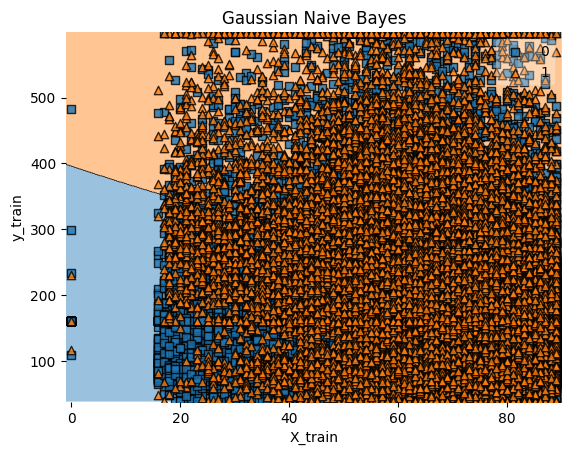

In [56]:
gnb_a(subset)